In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
df = pd.read_excel('Final_Brajrajnagar_data.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,From Date,PM10,PM2.5,WD,WS,AT
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

From Date    datetime64[ns]
PM10                float64
PM2.5               float64
WD                  float64
WS                  float64
AT                  float64
dtype: object

In [4]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)
df['From Date'] = pd.to_datetime(df['From Date'])
df['From Date'] = pd.to_datetime(df['From Date'])


df.dtypes
df.head()

,From Date,PM10,PM2.5,WD,WS,AT
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
#Set the date as Index
df = df.set_index(df['From Date'],drop = True)
df = df.sort_index()

#Take the mean of each day 
df = df.resample('d').mean()
df.head()
#Removing the outlier
df = df['2018-01':'2020-02']
df_ospcb = df.copy()

df_ospcb.head()

,PM10,PM2.5,WD,WS,AT
From Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962


In [6]:
date_series = df_ospcb.index
date_series

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='From Date', length=790, freq='D')

In [7]:
print(df_ospcb.columns)

Index(['PM10', 'PM2.5', 'WD', 'WS', 'AT'], dtype='object')


In [8]:
from sklearn.impute import KNNImputer

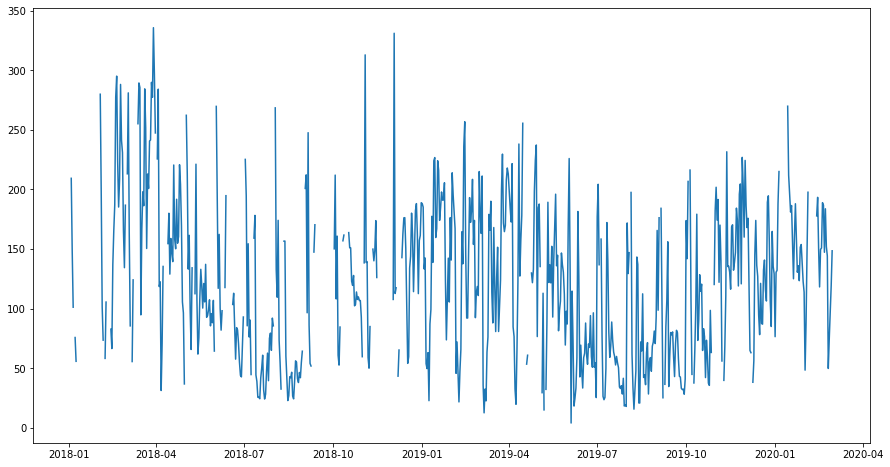

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

plt.plot(df_ospcb['PM10'])

In [10]:
imputer = KNNImputer(n_neighbors=200, weights='distance')
df_ospcb_imputed_knn = imputer.fit_transform(df_ospcb)

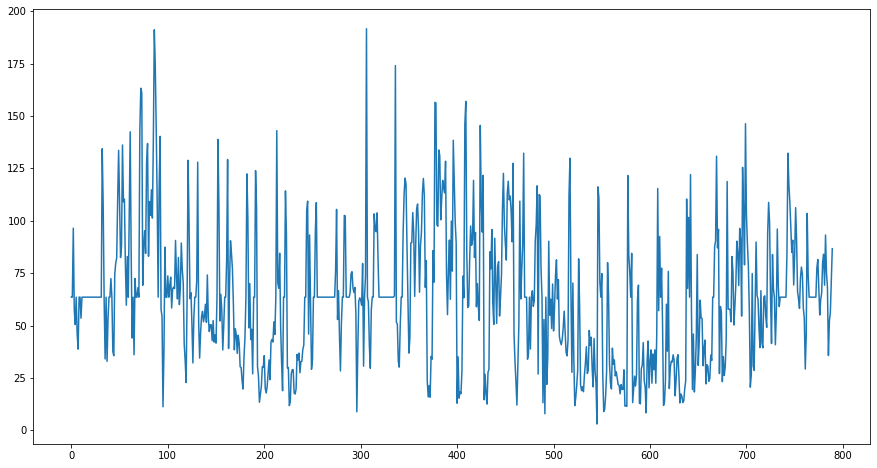

In [11]:
plt.plot(df_ospcb_imputed_knn[:, 1])

In [12]:
df_ospcb_after_impute = pd.DataFrame(data = df_ospcb_imputed_knn, columns = df_ospcb.columns)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT
0,122.033781,63.529906,175.018991,0.663696,25.599654
1,122.033781,63.529906,175.018991,0.663696,25.599654
2,209.367553,96.456277,110.399053,0.787158,25.485895
3,148.470978,57.417609,131.992043,1.210645,27.404839
4,101.171569,50.440980,161.040769,1.164038,26.170962


In [13]:
df_ospcb_after_impute['Date'] = date_series
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,Date
0,122.033781,63.529906,175.018991,0.663696,25.599654,2018-01-01
1,122.033781,63.529906,175.018991,0.663696,25.599654,2018-01-02
2,209.367553,96.456277,110.399053,0.787158,25.485895,2018-01-03
3,148.470978,57.417609,131.992043,1.210645,27.404839,2018-01-04
4,101.171569,50.440980,161.040769,1.164038,26.170962,2018-01-05


In [14]:
#Set the date as Index
df_ospcb_after_impute = df_ospcb_after_impute.set_index(df_ospcb_after_impute['Date'], drop = True)
df_ospcb_after_impute = df_ospcb_after_impute.sort_index()
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,Date
Date,,,,,,
2018-01-01,122.033781,63.529906,175.018991,0.663696,25.599654,2018-01-01
2018-01-02,122.033781,63.529906,175.018991,0.663696,25.599654,2018-01-02
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018-01-03
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018-01-04
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018-01-05


In [15]:
df_ospcb_after_impute = df_ospcb_after_impute.drop(['Date'], axis = 1)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT
Date,,,,,
2018-01-01,122.033781,63.529906,175.018991,0.663696,25.599654
2018-01-02,122.033781,63.529906,175.018991,0.663696,25.599654
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962


In [16]:
df_index_list = df_ospcb_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_ospcb_after_impute['year'] = list_year 
df_ospcb_after_impute['month'] = list_month 
df_ospcb_after_impute['day'] = list_day
df_ospcb_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_ospcb_after_impute['weekend'] = df_ospcb_after_impute['day_of_week'].apply(weekend)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,year,month,day,day_of_week,weekend
Date,,,,,,,,,,
2018-01-01,122.033781,63.529906,175.018991,0.663696,25.599654,2018,1,1,0,0
2018-01-02,122.033781,63.529906,175.018991,0.663696,25.599654,2018,1,2,1,0
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018,1,3,2,0
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018,1,4,3,0
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018,1,5,4,0


In [17]:
corr_mat = df_ospcb_after_impute.corr(method = 'pearson')
print(corr_mat)

                 PM10     PM2.5        WD  ...       day  day_of_week   weekend
PM10         1.000000  0.942216 -0.482280  ... -0.083668    -0.004435 -0.004176
PM2.5        0.942216  1.000000 -0.509201  ... -0.103545    -0.000450 -0.005869
WD          -0.482280 -0.509201  1.000000  ...  0.055573     0.000460 -0.008767
WS          -0.026579 -0.043429  0.036276  ... -0.062206     0.038401  0.041372
AT          -0.134265 -0.252673  0.410119  ... -0.113228     0.005750 -0.004539
year        -0.027327 -0.054714  0.065976  ... -0.003916     0.003902 -0.000598
month       -0.193408 -0.170998 -0.058471  ...  0.012298     0.003619  0.009268
day         -0.083668 -0.103545  0.055573  ...  1.000000    -0.003235 -0.009140
day_of_week -0.004435 -0.000450  0.000460  ... -0.003235     1.000000  0.789942
weekend     -0.004176 -0.005869 -0.008767  ... -0.009140     0.789942  1.000000

[10 rows x 10 columns]


In [18]:
corr_mat.to_excel("correlation_matrix.xlsx")

In [19]:
mean_ospcb = df_ospcb_after_impute['PM2.5'].min()
std_dev_ospcb = df_ospcb_after_impute['PM2.5'].max() - df_ospcb_after_impute['PM2.5'].min()

cols = ['PM10','PM2.5','WS','WD','AT','year','month','day','day_of_week','weekend']
for field in ['PM10','PM2.5','WS','WD','AT']:    
   df_ospcb_after_impute[field][df_ospcb_after_impute[field] > (df_ospcb_after_impute[field].mean() + 1.5*df_ospcb_after_impute[field].std())] = np.nan


In [20]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 62
PM2.5 68
WS 6
WD 70
AT 46
year 0
month 0
day 0
day_of_week 0
weekend 0


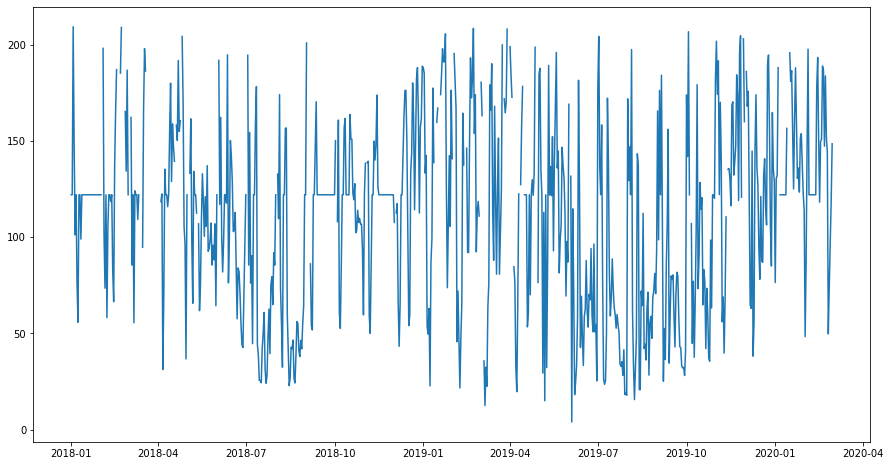

In [21]:
plt.plot(df_ospcb_after_impute['PM10'])

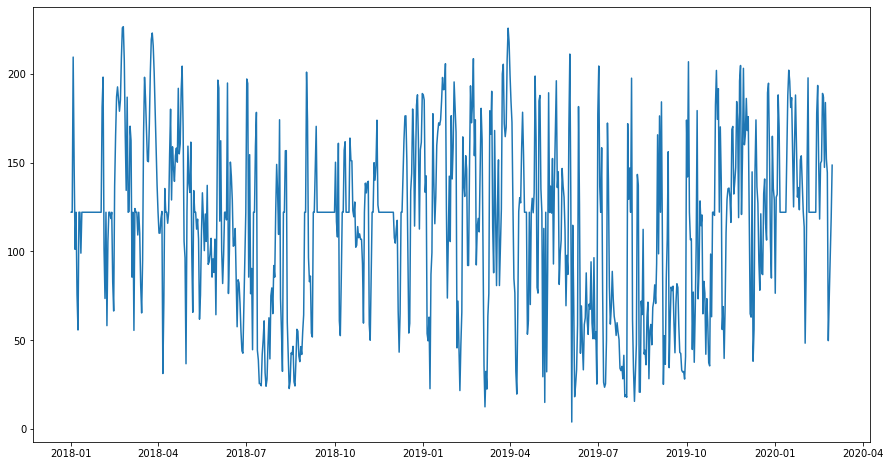

In [22]:
for field in ['PM10','PM2.5','WS','WD','AT']:
   df_ospcb_after_impute[field] = df_ospcb_after_impute[field].interpolate(method = 'spline', order = 3)
plt.plot(df_ospcb_after_impute['PM10'])

In [23]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 0
PM2.5 0
WS 0
WD 0
AT 0
year 0
month 0
day 0
day_of_week 0
weekend 0


In [24]:
  #df_ospcb_after_impute =  df_ospcb_after_impute.iloc[1:,:]
  df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,year,month,day,day_of_week,weekend
Date,,,,,,,,,,
2018-01-01,122.033781,63.529906,175.018991,0.663696,25.599654,2018,1,1,0,0
2018-01-02,122.033781,63.529906,175.018991,0.663696,25.599654,2018,1,2,1,0
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018,1,3,2,0
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018,1,4,3,0
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018,1,5,4,0


In [25]:
cols = ['PM10','PM2.5','WS','WD','AT','year','month','day','day_of_week','weekend']
for field in cols:
   df_ospcb_after_impute[field] = (df_ospcb_after_impute[field] - df_ospcb_after_impute[field].min())/(df_ospcb_after_impute[field].max() - df_ospcb_after_impute[field].min())

df_ospcb_after_impute = df_ospcb_after_impute[['WS','PM10','WD','AT','year','month','day','day_of_week','weekend','PM2.5']]
df_ospcb_after_impute.head()

,WS,PM10,WD,AT,year,month,day,day_of_week,weekend,PM2.5
Date,,,,,,,,,,
2018-01-01,0.372390,0.530622,0.529714,0.582534,0.0,0.0,0.000000,0.000000,0.0,0.437583
2018-01-02,0.372390,0.530622,0.529714,0.582534,0.0,0.0,0.033333,0.166667,0.0,0.437583
2018-01-03,0.476303,0.923133,0.206813,0.577267,0.0,0.0,0.066667,0.333333,0.0,0.675536
2018-01-04,0.832737,0.649441,0.314711,0.666110,0.0,0.0,0.100000,0.500000,0.0,0.393410
2018-01-05,0.793509,0.436860,0.459866,0.608984,0.0,0.0,0.133333,0.666667,0.0,0.342992


In [26]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df_ospcb_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]
                     
print("SUCCESS!!")

SUCCESS!!


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features))))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='RMSprop', loss='mae')

print('SUCCESS!!')

Using TensorFlow backend.


SUCCESS!!


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=1000)

#from sklearn.externals import joblib 
#path = "/content/drive/My Drive/Journal_models/model_lstm_50back.pkl"  
# Save the model as a pickle in a file 
#joblib.dump(model, path) 

# # fit model
# model.fit(X, y, epochs=2000, verbose=2)

Epoch 1/1000
 - 2s - loss: 0.1925
Epoch 2/1000
 - 1s - loss: 0.1484
Epoch 3/1000
 - 1s - loss: 0.1439
Epoch 4/1000
 - 1s - loss: 0.1349
Epoch 5/1000
 - 1s - loss: 0.1341
Epoch 6/1000
 - 1s - loss: 0.1290
Epoch 7/1000
 - 1s - loss: 0.1320
Epoch 8/1000
 - 1s - loss: 0.1243
Epoch 9/1000
 - 1s - loss: 0.1215
Epoch 10/1000
 - 1s - loss: 0.1222
Epoch 11/1000
 - 1s - loss: 0.1180
Epoch 12/1000
 - 1s - loss: 0.1174
Epoch 13/1000
 - 1s - loss: 0.1175
Epoch 14/1000
 - 1s - loss: 0.1140
Epoch 15/1000
 - 1s - loss: 0.1106
Epoch 16/1000
 - 1s - loss: 0.1084
Epoch 17/1000
 - 1s - loss: 0.1083
Epoch 18/1000
 - 1s - loss: 0.1067
Epoch 19/1000
 - 1s - loss: 0.1052
Epoch 20/1000
 - 1s - loss: 0.1030
Epoch 21/1000
 - 1s - loss: 0.1040
Epoch 22/1000
 - 1s - loss: 0.0994
Epoch 23/1000
 - 1s - loss: 0.0998
Epoch 24/1000
 - 1s - loss: 0.0971
Epoch 25/1000
 - 1s - loss: 0.0938
Epoch 26/1000
 - 1s - loss: 0.0943
Epoch 27/1000
 - 1s - loss: 0.0929
Epoch 28/1000
 - 1s - loss: 0.0904
Epoch 29/1000
 - 1s - loss: 0

In [29]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_dev_ospcb)+mean_ospcb)
print((y_test*std_dev_ospcb)+mean_ospcb)

[119.07289  150.35065  118.817505 100.32452 ]
[121.96826596 131.59873548 167.32692097 204.63677592]


In [30]:
y_test = (y_test*std_dev_ospcb)+mean_ospcb
yhat = (yhat[0]*std_dev_ospcb)+mean_ospcb
print(yhat)
print(y_test)

[119.07289  150.35065  118.817505 100.32452 ]
[121.96826596 131.59873548 167.32692097 204.63677592]


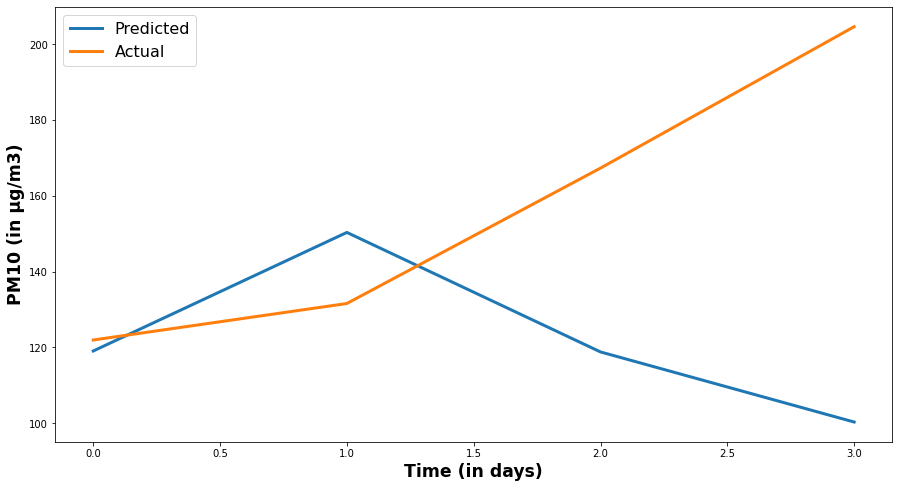

In [31]:
plt.plot((yhat),label = 'Predicted', linewidth = 3)
plt.plot((y_test), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms = sqrt(mean_squared_error(y_test, yhat))
print(rms)

mse = mean_squared_error(y_test, yhat)
print(mse)

mae = mean_absolute_error(y_test, yhat)
print(mae)

mape = mean_absolute_percentage_error(y_test, yhat)
print(mape)

58.2971447308133
3398.557083765393
43.617240480816356
24.147083443891876
